### Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spam_df = pd.read_csv("C:\\Users\\HP\\Documents\\Courses\\digitalvidya\\datasets\\spam.csv", encoding='ISO-8859-1', engine='c')
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
spam_df = spam_df[['v1', 'v2']]
spam_df.rename(columns={'v1':'label', 'v2':'body_text'}, inplace=True)
spam_df.head()

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
spam_df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Preprocessing Data

#### Q1. Preprocess the data so that stopwords are removed
#### Q2. Write down a function that can count percentage of punctuation words in the text


In [8]:
#q1
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

ps = PorterStemmer()

spam_df['body_text'] = spam_df['body_text'].str.lower().str.replace('[^a-z]', ' ').str.split()
spam_df['body_text'] = spam_df['body_text'].apply(lambda x: ' '.join([ps.stem(word) for word in x if word not in set(stopwords.words('english'))]))

spam_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,label,body_text
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though


In [12]:
import sys
!{sys.executable} -m pip install wordcloud 

In [13]:
#q2
from wordcloud import WordCloud

In [14]:
spam_list = spam_df[spam_df["label"] == "spam"]["body_text"].unique().tolist()
spam_list[:2]

['free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv']

In [15]:
spam = " ".join(spam_list)
spam[:100]

'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli '

In [16]:
# create a word cloud for spam
spam_wordcloud = WordCloud().generate(spam)

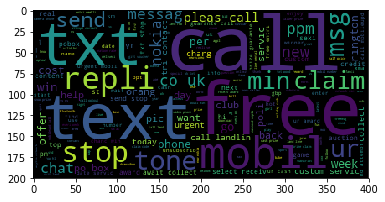

In [17]:
# show the created image of word cloud
plt.figure()
plt.imshow(spam_wordcloud)
plt.show()

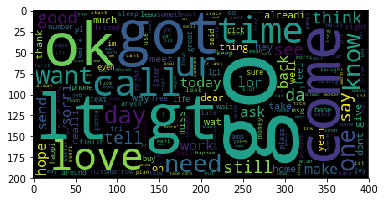

In [18]:
ham_list = spam_df[spam_df["label"] == "ham"]["body_text"].unique().tolist()
ham_list[:2]
ham = " ".join(ham_list)
ham[:100]
# create a word cloud for spam
ham_wordcloud = WordCloud().generate(ham)
# show the created image of word cloud
plt.figure()
plt.imshow(ham_wordcloud)
plt.show()

In [19]:
# import the vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# create an instance
count_vect = CountVectorizer()
# fit the vectorizer with data
count_vect.fit(spam_df.body_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [21]:
# convert text to vectors
X = count_vect.transform(spam_df.body_text).toarray()

In [23]:
X.shape

(5572, 6221)

### Split into train/test

#### Q3. Split the whole data set into training and test datasets

In [24]:
#q3
# encode the target strings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(spam_df.label)
y[:5]

array([0, 0, 1, 0, 0])

In [25]:
y.shape

(5572,)

In [26]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [27]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)



### Vectorize text

#### Q4. For the test and train datasets create a TfIdfVectorizer

In [30]:
pd.DataFrame(count_vect.fit_transform(spam_df.body_text).toarray(), columns=count_vect.get_feature_names()).head()

,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zero,zf,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Final evaluation of models

#### Q5. Create a Ensemble classifier that can predict if the given Text is a Spam or a Ham 
#### Q6. Evaluate the performance of your model using confusion matrix

In [31]:
#q5
X_train.shape

(4179, 6221)

In [32]:
X_test.shape

(1393, 6221)

In [33]:
# import Nauve bayes classifier
from sklearn.naive_bayes import MultinomialNB

In [34]:
# fit the classifier model
clf = MultinomialNB()
clf.fit(X_train, y_train)
# predict the outcome for testing data
predictions = clf.predict(X_test)
predictions.shape
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9791816223977028

In [35]:
# select 20 records
test_data = spam_df.head(10).body_text.tolist() + spam_df.tail(10).body_text.tolist()
actual_label = spam_df.head(10).label.tolist() + spam_df.tail(10).label.tolist()

len(test_data)

20

In [36]:
test_preds = clf.predict(count_vect.transform(test_data))
test_preds.shape

(20,)

In [37]:
# print actual vs predicted
i = 0
for sms, label in zip(test_data, actual_label):
    print(str(test_data[i][:50]) +" ("+ str(actual_label[i]) +") => "+ str(test_preds[i]) )
    i += 1

go jurong point crazi avail bugi n great world la  (ham) => 0
ok lar joke wif u oni (ham) => 0
free entri wkli comp win fa cup final tkt st may t (spam) => 1
u dun say earli hor u c alreadi say (ham) => 0
nah think goe usf live around though (ham) => 0
freemsg hey darl week word back like fun still tb  (spam) => 1
even brother like speak treat like aid patent (ham) => 0
per request mell mell oru minnaminungint nurungu v (ham) => 0
winner valu network custom select receivea prize r (spam) => 1
mobil month u r entitl updat latest colour mobil c (spam) => 1
ok lor soni ericsson salesman ask shuhui say quit  (ham) => 0
ard like dat lor (ham) => 0
wait til least wednesday see get (ham) => 0
huh lei (ham) => 0
remind get pound free call credit detail great off (spam) => 1
nd time tri contact u u pound prize claim easi cal (spam) => 1
b go esplanad fr home (ham) => 0
piti mood suggest (ham) => 0
guy bitch act like interest buy someth els next we (ham) => 0
rofl true name (ham) => 0


In [38]:
# import the DT classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')

In [39]:
# fit the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
# predict the outcome for testing data
predictions = clf.predict(X_test)
predictions.shape

(1393,)

In [41]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9763101220387652

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=5)

In [43]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
# predict the outcome for testing data
predictions = clf.predict(X_test)
predictions.shape

(1393,)

In [45]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9720028715003589

In [47]:
#q6
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

In [48]:
cm

array([[1192,    4],
       [  35,  162]], dtype=int64)

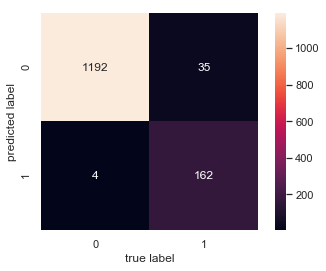

In [51]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm.T, square=True, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label');